The metrics to use for binary classification are precision and recall

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# 1000 entries

In [3]:
y_values = [
 0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0
,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0
,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0
,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1
,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0
,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
,0,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0
,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0
,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0
,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1
,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
,0]

y_pred = [
 0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1
,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0
,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1
,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1
,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
,0]

In [4]:
cm = confusion_matrix(y_values, y_pred)
print(f'Confusion Matrix:\n {confusion_matrix(y_values, y_pred)}')

Confusion Matrix:
 [[722  37]
 [102 139]]


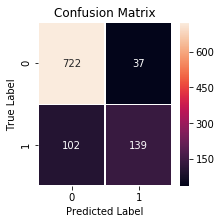

In [5]:
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="white",fmt = ".0f",ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig('./PPT_IMG/blog_CMatrix')
plt.show()

In [6]:
TP = cm[1,1]  # True Positives
TN = cm[0,0]  # True Negatives
FP = cm[0,1]  # False Positves - Type I Errors
FN = cm[1,0]  # False Negatives - Type II Errors
ttl_popl = TP+TN+FP+FN
print(f'Confusion Matrix Metrics: TP = {TP} | TN = {TN} | FP = {FP} | FN = {FN} || Total Popl = {ttl_popl}\n')

Confusion Matrix Metrics: TP = 139 | TN = 722 | FP = 37 | FN = 102 || Total Popl = 1000



In [16]:
# precision_score
display(precision_score(y_values, y_pred))

precision = TP / (TP + FP)
precision

0.7897727272727273

0.7897727272727273

In [15]:
# recall_score
display(recall_score(y_values, y_pred))

recall = TP / (TP + FN) 
recall

0.5767634854771784

0.5767634854771784

In [20]:
# f1_score
display(f1_score(y_values, y_pred))

f1 = 2*((precision*recall)/(precision+recall))
f1

0.6666666666666666

0.6666666666666666

In [14]:
# accuracy_score
display(accuracy_score(y_values, y_pred))

accuracy = (TP + TN) / ttl_popl
accuracy

0.861

0.861

In [13]:
# misclassification rate
display(1- accuracy_score(y_values, y_pred))

misclassification = (FP + FN) / (TP+FP+FN+TN)
misclassification

0.139

0.139

In [21]:
.861 + .139

1.0

In [22]:
# Specificity
specificity = TN / (TN + FP)
specificity

0.9512516469038208